# Classifcation problem for classical Iris dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['target', 'target_names', 'feature_names', 'DESCR', 'data'])

In [7]:
#Get description
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
#Thats what I have to predict
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [10]:
#My feature space
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
#Data itself in 'target' and 'data'

print(type(iris['data']))
print(type(iris['target']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
#Check shape
iris['data'].shape


(150, 4)

In [19]:
#Load as dataframe in pandas, just to have a better understanding of it
import pandas as pd

d = pd.DataFrame(iris['data'], columns= iris['feature_names'])

In [20]:
d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Setting goal
We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements.


Before we can apply our model to new measurements, we need to know whether our model actually works, that is whether we should trust its predictions.
Unfortunately, we can not use the data we use to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. This “remembering” does not indicate to us whether our model will generalize well, in other words whether it will also perform well on new data. So before we apply our model to new measurements, we will want to know whether we can trust its predic‐ tions.
To assess the models’ performance, we show the model new data (that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected (here our 150 flower measurements) into two parts.
The part of the data is used to build our machine learning model, and is called the training data or training set. The rest of the data will be used to access how well the model works and is called test data, test set or hold-out set.

In [21]:
from sklearn.model_selection import train_test_split

The train_test_split function shuffles the dataset using a pseudo random number generator before making the split. If we would take the last 25% of the data as a test set, all the data point would have the label 2, as the data points are sorted by the label (see the output for iris['target'] above). Using a tests set containing only one of the three classes would not tell us much about how well we generalize, so we shuffle our data, to make sure the test data contains data from all classes.


To make sure that we will get the same output if we run the same function several times, we provide the pseudo random number generator with a fixed seed using the random_state parameter. This will make the outcome deterministic, so this line will always have the same outcome. We will always fix the random_state in this way when using randomized procedures in this book.

In [22]:
#by default, it splits 75% for training and rest (25%) for testing
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

## First things to do: look at your data

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

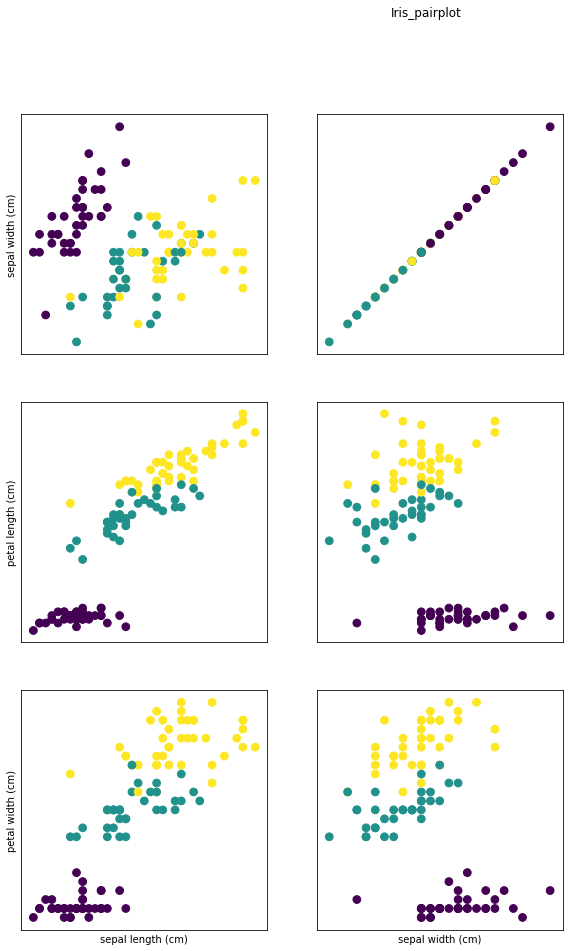

In [30]:
fig, ax = plt.subplots(3 , 3, figsize = (15,15))
plt.suptitle("Iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:, j ],X_train[:, i+1], c = y_train, s= 60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i+1])
        if j > 1:
            ax[i,j].set_visible(False)

In [39]:
#Alternatively, use seaborn, check here http://seaborn.pydata.org/generated/seaborn.pairplot.html

import seaborn as sns
sns.set(style="ticks", color_codes=True)

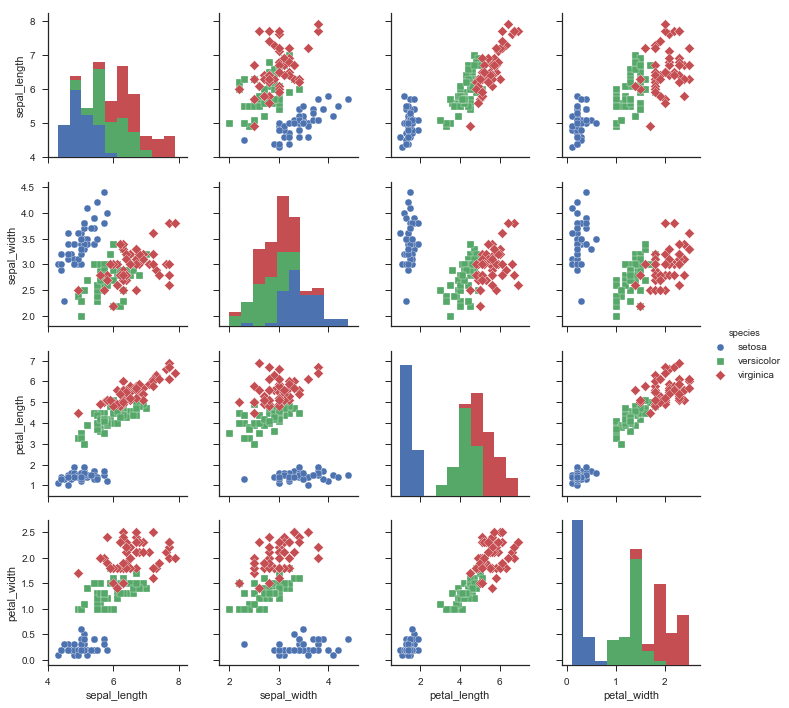

In [40]:
sns.pairplot(sns.load_dataset('iris'),hue="species", markers=["o", "s", "D"])


## KNN

Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then, it and assigns the label of this closest data training point to the new data point.


All machine learning models in scikit-learn are implemented in their own class, which are called Estimator classes. The k nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module.

Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The single parameter of the KNeighbor sClassifier is the number of neighbors, which we will set to one:

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Make prediction

Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of 2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would this be?
We can put this data into a numpy array, again with the shape number of samples (one) times number of features (four):

In [45]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])

In [46]:
X_new.shape

(1, 4)

To make prediction we call the predict method of the knn object:

In [47]:
prediction = knn.predict(X_new)
prediction

array([0])

In [48]:
iris['target_names'][prediction]

array(['setosa'], 
      dtype='<U10')

## Evaluating the model

In [50]:
y_pred = knn.predict(X_test)

In [51]:
np.mean(y_pred == y_test)

0.97368421052631582

In [52]:
#Alternatively, use score method on knn object to compute accuracy
knn.score(X_test, y_test)

0.97368421052631582